# Configuration

This section discusses ways to set up your MLFlow.

## Connecting

Use `mlflow.set_tracking_uri` to specify the uri for the mlflow for the pythonAPI.

### Environment variables

You can specify **environment variables** to connect to MLFlow:

- `MLFLOW_TRACKING_URI`: specifies the URI that must be used to connect to the MLFLOW server.
- `MLFLOW_TRACKING_USERNAME`: specifies the username to be used to log in to MLFlow.
- `MLFLOW_TRACKING_PASSWORD`: specifies the password to be used to log in to MLFlow.

Once these variables are loaded into the Python environment, MLFlow will automatically find and use them.

### Funcitons

Use the functions `mlflow.set_tracking_uri` and `mlflow.get_tracking_uri` to manipulate the tracking uri directly from the code.

---

A really typical issue for me is to check if the uri I specified in the `MLFLOW_TRACKING_URI` is recognized by the `mlflow`. The following cell implements an experiment where to `MLFLOW_TRACKING_URI` in python is set to some specific value and shows that `mlflow.get_tracking_uri` returns the exactly specified value.

In [ ]:
import os
import mlflow

os.environ["MLFLOW_TRACKING_URI"] = "uri from environ"
mlflow.get_tracking_uri()

'uri from environ'

The next cell uses `mlflow.set_tracking_uri` and shows that the uri is updated.

In [ ]:
mlflow.set_tracking_uri("test uri")
mlflow.get_tracking_uri()

'test uri'

### URI

The URI actually specifies where MLFlow stores the logged information. There are two options:

- If you have an **mlflow server**, specify the `http` URL to it, like this: `https://mlflow.domen:5000`. **Note** 5000 is the typical port for the mlflow.
- Specify the **local folder** in the format `file://<path in local filesystem>`.
- If you are working in Databricks, you should have access to the **Unity Catalog**. Use `databricks-uc` to use it as the model URI.

---

The following cell creates the `/tmp/mlflow_runs` directory, and sets it as mlflow trakcing uri.

In [ ]:
from pathlib import Path
mlflow_runs = Path("/tmp") / "mlflow_runs"
mlflow_runs.mkdir(exist_ok=True)
mlflow.set_tracking_uri(f"file://{str(mlflow_runs)}")

The following cell generates a new experiment, and displays the ID.

In [ ]:
mlflow.create_experiment("my_experiment")

'996475202870020725'

To ensure that the information was stored exactly in the folder specified tracking URI folder, the following cell shows the folder's content.

In [ ]:
list(mlflow_runs.iterdir())

[PosixPath('/tmp/mlflow_runs/996475202870020725'),
 PosixPath('/tmp/mlflow_runs/.trash')]

## Start server

MLflow should have a tracking server. Here we describe how to start it locally from docker.

Use `mlflow server` command to run the mlflow server.

### Docker

Load docker image.

In [1]:
!docker pull ghcr.io/mlflow/mlflow &> /dev/null

The following command will start the mlflow server in docker, but it's also acceptable in the host.

In [3]:
%%bash
docker run -p 5000:5000 -dt --name my_server --rm \
    ghcr.io/mlflow/mlflow \
    bash -c "mlflow server --host 0.0.0.0 --port 5000"

62bd5e3562c186a72bafe3de4fa69219d15cce8fa0ca31b86c6b922070cda425


Don't forget to stop the server after playing with it.

In [1]:
!docker stop my_server

my_server


In [ ]:
!mlflow server --backend-store-uri file:///tmp/server & &> /dev/null

### Check

Now you can access your mlflow UI using the browser url `localhost:5000`. Let's have a look at mlflow using the `selenium` screenshot.

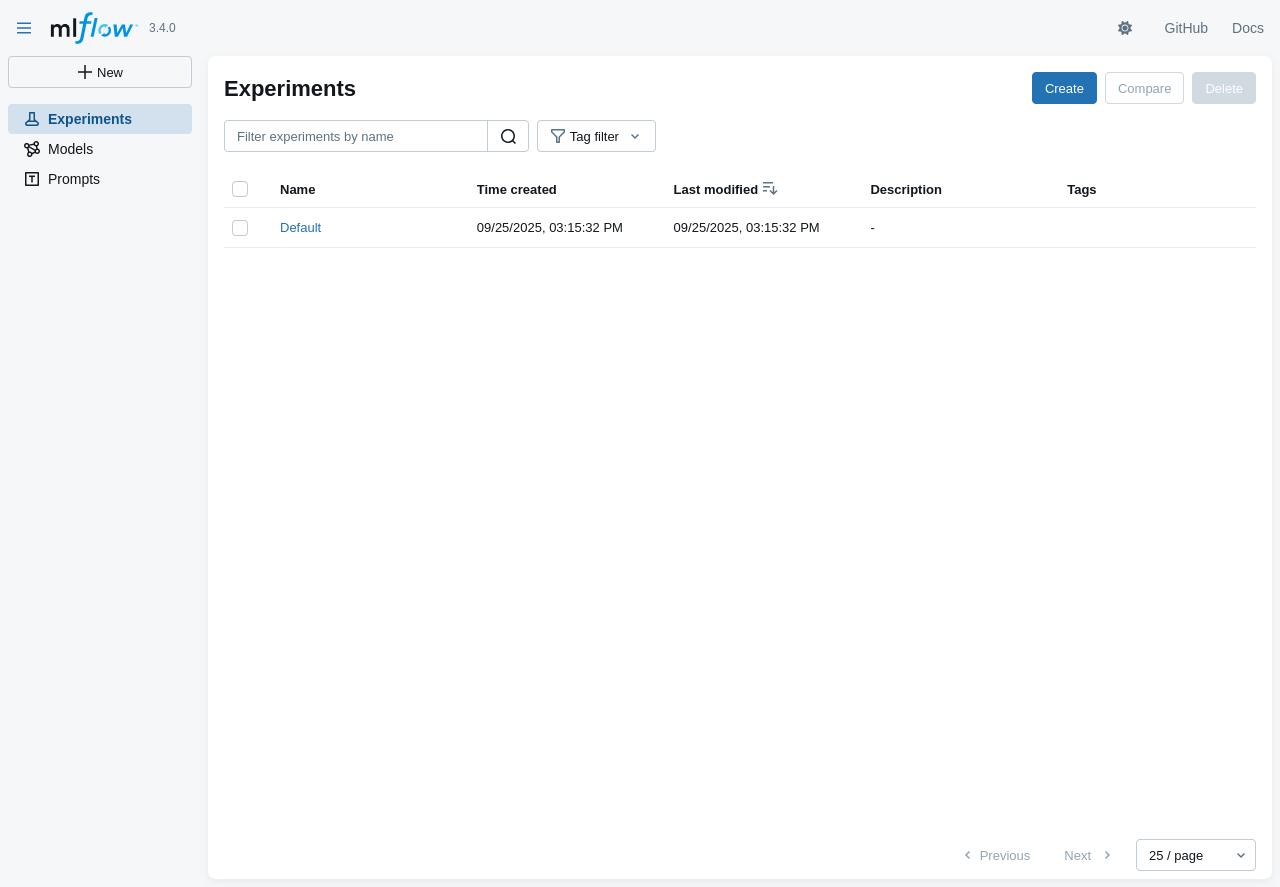

In [5]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from PIL import Image
import io

# Set up Firefox options
options = Options()
options.binary_location = "/usr/bin/firefox"

driver = webdriver.Firefox(
    options=Options(),
    service=Service(
        # path to the geckodriver on my computer
        executable_path="/snap/bin/geckodriver",
        log_output="/dev/null"
    )
)
driver.get("http://localhost:5000")

sleep(3)

screenshot = driver.get_screenshot_as_png()
image = Image.open(io.BytesIO(screenshot))
display(image)

driver.close()